# House Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Used this to check if data has any null values - Data Count is same or not
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Used this to check categorical data values
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286908,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704698,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

/Users/lav/.conda/envs/RealEstateHousePricePredictor/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

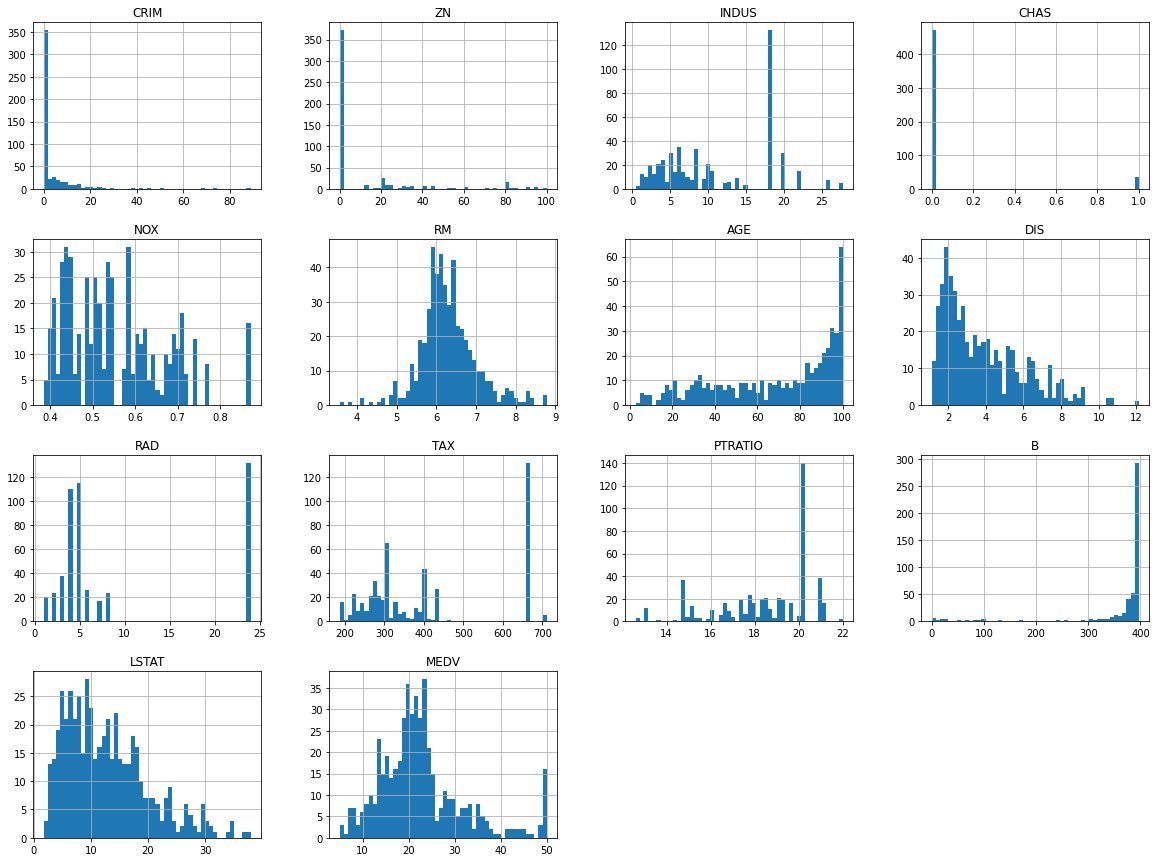

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train Test Splitting

In [10]:
# Learning Purpose Only - START
'''
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
print(f"Rows in Training Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")
'''

'\nimport numpy as np\ndef split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\ntrain_set, test_set = split_train_test(housing, 0.2)\nprint(f"Rows in Training Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")\n'

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in Training Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

Rows in Training Set: 404
Rows in Test Set: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
95/7

13.571428571428571

In [16]:
376/28

13.428571428571429

In [17]:
housing = strat_train_set.copy()

## Looking for Correlations

In [18]:
corr_matrix = housing.corr()
# To identify Strong/High/Inverse Correlations
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679204
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

/Users/lav/.conda/envs/RealEstateHousePricePredictor/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

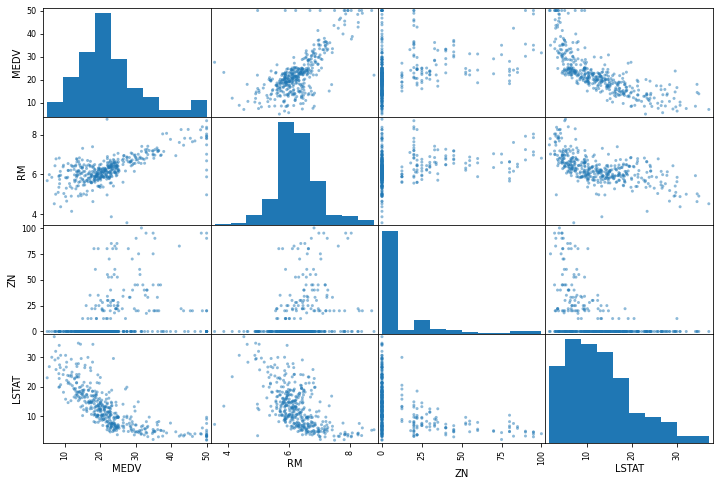

In [19]:
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

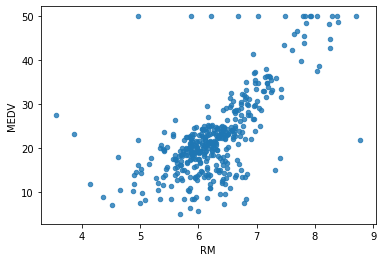

In [20]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha=0.8)

## Figuring Out Attribute Combinations

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [22]:
corr_matrix = housing.corr()
# To identify Strong/High/Inverse Correlations
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679204
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [23]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [24]:
# To take care of missing values, you have 3 options:
# 1. Get rid of missing data points/row
# 2. Get rid of missing feature
# 3. Replace the missing values with some values (0, mean, or median)

In [25]:
a = housing.dropna(subset=['RM']) # Option.1
a.shape

(400, 13)

In [26]:
housing.drop("RM", axis=1).shape # Option.2

(404, 12)

In [27]:
# Option.3 - Compute Median
median = housing["RM"].median()

In [28]:
housing["RM"].fillna(median)
# Original Data Unchanged 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe() # Before we started missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281690,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715095,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_.shape

(13,)

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281015,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711570,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primary 3 types of the objects
1. Estimators - It estimates some parameter based on a dataset. Eg. Imputer
It has fit method and transform method
Fit - Fits the dataset and calculates internal parameters  
2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convin
3. Predictors

## Feature Scaling

Primary, there are two types of feature scaling methods:
    1. Min-max scaling (Normalization)
        (value - min) / (max - min)
        Sklearn provides a class called MinMaxScaler for this
    2. Standardisation
        (value - mean) / std
        Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]

In [41]:
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([22.324, 25.251, 16.573, 23.488, 23.566])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predcitions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predcitions)
lin_rmse = np.sqrt(lin_mse)

In [46]:
lin_rmse ## Error Rate Too High - Discard Model - With LinearRegressor - Changed it to DecisionTreeRegressor

1.194376971064789

## Using Better Evaluation Technique - Cross Validation


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([2.89345745, 2.6561261 , 4.38349603, 2.41703796, 3.24044767,
       2.63424831, 4.47412105, 3.30372916, 3.02024723, 3.32541502])

In [49]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [50]:
print_scores(rmse_scores)

Scores:  [2.89345745 2.6561261  4.38349603 2.41703796 3.24044767 2.63424831
 4.47412105 3.30372916 3.02024723 3.32541502]
Mean:  3.234832596718463
Standard Deviation:  0.6629646761000674


Will convert this Jupyter Notebook into a Python File - and run it on PyCharm

## Saving the model

In [51]:
from joblib import dump, load
dump(model, 'HousingModel.joblib')

['HousingModel.joblib']

## Testing the model on Test Data

In [52]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test =  strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(list(final_predictions))
print(list(Y_test))

[24.146, 11.45, 25.853999999999996, 22.352000000000004, 19.32899999999999, 14.837999999999996, 20.36, 14.13199999999999, 31.146999999999995, 41.14100000000002, 19.350000000000005, 12.067999999999993, 24.336, 28.08299999999999, 19.533, 11.633999999999993, 31.20999999999999, 14.388000000000002, 23.935999999999982, 18.605999999999998, 19.870999999999984, 17.781000000000002, 17.139, 22.39200000000001, 18.790999999999983, 31.632999999999996, 15.962999999999997, 33.376999999999995, 8.765999999999998, 33.185999999999986, 24.085999999999995, 21.39199999999999, 23.171999999999983, 10.915999999999997, 20.994999999999987, 10.793999999999999, 43.084000000000024, 24.414999999999996, 23.355, 42.16400000000001, 23.921999999999997, 29.91600000000002, 20.315000000000012, 20.921000000000003, 19.01499999999999, 33.23199999999999, 44.89900000000003, 20.200999999999997, 20.317999999999998, 21.532999999999998, 21.486999999999995, 14.392999999999999, 21.537, 14.793999999999992, 25.441999999999993, 32.9949999

In [53]:
final_rmse

2.865930617429802

Rough Work

In [54]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24344675, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [55]:
from joblib import dump, load
import numpy as np
model = load('HousingModel.joblib')

In [56]:
features = np.array([[-0.43942006,  5.12628155, -1.12165014, -0.27288841, -1.42262747,
       0.45344675, -1.31238772,  2.61111401, -11.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.186091034]])
model.predict(features)

array([22.25])